# Moore's Law

Gordon Moore in 1965 predicted that the number of transistors that could be included on an integrated circuit would double every 2 years. This has largely been true and has impacted CPU power, RAM capacity, and hard drive capacity.  

A doubling every 2 years means 2^5 in 10 years, i.e. a factor of 32. In 20 years, it is a factor of ~1000. In the almost 60 years since Moore made this prediction, Moore's Law would predict computer power and storage have become 1 billion times cheapter. This increased computing capacity has had a profound effect on everything, including volcano-seismic monitoring.

As a real example of Moore's Law, the following code uses <a href="https://ourworldindata.org/grapher/historical-cost-of-computer-memory-and-storage">actual data</a> of hard drive costs through time:

Raw data requires 0.97 GB of storage per day, and 352 GB per year

Storage cost for 1 year of data, in different years:
1985: US$10,807,312
2000: US$1,401
2023: US$5


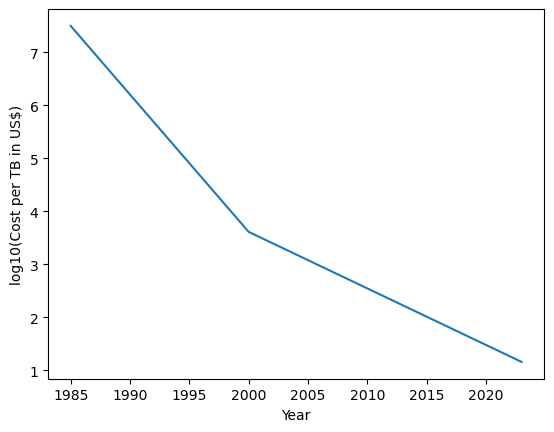

In [6]:
# Algorithm to compute raw storage space needed for seismic data

import matplotlib.pyplot as plt
import numpy as np

def storage_space(samplingRate=100, bitsPerSample=32, numComponentsPerStation=3, numStations=10):
    BITS_PER_BYTE = 8
    SECONDS_PER_DAY = 60 * 60 * 24
    bytesPerGb = 1024**3
    gbPerDayPerChannel = (samplingRate * (bitsPerSample/BITS_PER_BYTE) * SECONDS_PER_DAY) / bytesPerGb
    gbPerDayNetwork = gbPerDayPerChannel * numComponentsPerStation * numStations
    print(f"Raw data requires {gbPerDayNetwork:.02f} GB of storage per day, and {gbPerDayNetwork * 365:.0f} GB per year")

    dollarsPerTB = {'1985':31400000, '2000':4070, '2023':14.3}
    plt.plot([int(k) for k in dollarsPerTB], [np.log10(dollarsPerTB[k]) for k in dollarsPerTB])
    plt.ylabel('log10(Cost per TB in US$)')
    plt.xlabel('Year')
    
    print("\nStorage cost for 1 year of data, in different years:")
    for key in dollarsPerTB:  
        print(f"{key}: US${(gbPerDayNetwork * 365 * dollarsPerTB[key]/1024):,.0f}")

storage_space(samplingRate=100, bitsPerSample=32, numComponentsPerStation=3, numStations=10)
    

Let's use this as a lens to explore and explain some different eruptions through time.

1. Mount St. Helens, 1980-1986.
2. Soufriere Hills Montserrat, 1995-2010.
3. A modern observatory today.

## 1. Mount St. Helens, 1980-1986

Imagine it is Spring 1985, and you are a Seismologist at the USGS Cascades Volcano Observatory (CVO). Tremor is appearing on the helical drum recorders ("helicorders"), and has appeared before most of the explosive eruptions over the past 5 years, including the catastrophic May 18, 1980 sector collapse. 

Volcano-seismic monitoring is simple at this time, and largely consists of:
1. Counting the number of earthquakes each day on the drum records ("daily counts")
2. Creating a "catalog" of located volcano-tectonic earthquakes, mapping their locations, and estimating their magnitudes
3. During heightened times of unrest, manning an Operations Room 24-7 with analysts continuously watching the drums, and communicating with field crews by 2-way radio ("real-time monitoring")

So all you have are helicorder plots (hundreds of large sheets of paper), and the catalog. You don't have any digital version of the continuous seismic data sitting on a hard drive, or on a CD. Why? 
- CD-ROM drives didn't appear until ~1990
- hard drive storage was too expensive (about US$10 million, as shown by the code above).

Given these costs, STA/LTA algorithms were used to capture anomalous signals - volcanic earthquakes - while the continuous data were generally discarded (or at best, recorded to tape).

Anyway, there was no easy way to compare tremor levels. But <strong>you can store a massively downsampled version of the continuous seismic data instead!</strong>, and then track trends in those data easily.

This idea led to the Real-time Seismic Amplitude Measurement (RSAM) system.

# 2. Redoubt, Alaska, 1989-1990
This was the first eruption monitored by the Alaska Volcano Observatory, founded in 1988. The monitoring was essentially the same as at Cascades Volccano Obsevratory during the time of St Helens, with the addition of the RSAM system. However, recognizing the value of frequency-based analysis, which the RSAM system couldn't do, a new system was developed by Chris Stephens called the "Seismic Spectral Measurement Method". In essence, this was low-resolution spectrograms, with a frequency resolution of 1 Hz, and a time resolution of 10 minutes. Crude, but sufficient to see some trends in tremor spectra.

# 3. Soufriere Hills Montserrat, 1995-2010
When I first travelled to Montserrat in 1996, things had advanced a little, but not much. Seismic monitoring was still largely based on paper helicorder plots, RSAM, SSAM, and basic event detection & analysis. No continuous digital data were being recorded beyond 1-minute RSAM and 10-minute SSAM. But within a few months the British Geological Survey installed what was then one of the first fully digital seismic networks on a volcano. 4 of the 8 stations even had broadband seismometers. Although the data were of much greater quality, there were no real-time monitoring tools, and the network was not integrated in any way with the pre-existing analog network USGS had installed. so when I arrived in Montserrat as Senior Seismologist in 2000, I set about integrating the best features of both, and expanding on them. We still only had 9 GB of total disk storage at the observatory, 